#  Real Estates in France 1st semester 2020


In [91]:
import pandas as pd
import matplotlib.pyplot as plt

### Connexion to Database (try with 2 differents connectors)

##### With mysql connector

In [2]:
import mysql.connector as sql

In [114]:
sql_=sql.connect(host = "localhost",
    user = "Phil",
    password = "")

In [115]:
cursor=sql_.cursor()

In [116]:
cursor.execute('show databases;')

In [117]:
for i in cursor:
    print(i)

('dataimmo',)
('foodly',)
('information_schema',)
('moviz',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [118]:
sql_.close

<bound method CMySQLConnection.close of <mysql.connector.connection_cext.CMySQLConnection object at 0x0000015E37204DC0>>

#### With sqlalceimy

In [119]:
import sqlalchemy as sql_al

In [120]:
engine=sql_al.create_engine('mysql://Phil:@127.0.0.1/dataimmo')

In [121]:
tables=engine.execute('show tables')

In [122]:
for i in tables:
    print(i)

('adresse',)
('bienimmo',)
('temp_adresse',)
('vente',)


### SQL queries after data preparation

## Data preparation

#### Getting the tables and join them

In [ ]:
property=pd.read_sql_table("bienimmo",engine)
sales=pd.read_sql_table("vente",engine)
adress=pd.read_sql_table("adresse",engine)

In [124]:
#Merge property and adress
df_realEstates=pd.merge(property,adress,left_on="adresse_id",right_on="id")

In [125]:
df_realEstates

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep
0,1,22,50.42,2,Appartement,1,1,190,RUE,CENTRALE,1370,SAINT-ETIENNE-DU-BOIS,1
1,2,12,48.22,3,Appartement,2,2,347,RUE,DU CHATEAU,1170,CHEVRY,1
2,3,146,130.80,6,Appartement,3,3,58,AV,DU MONT BLANC,1220,DIVONNE-LES-BAINS,1
3,4,11,109.22,5,Maison,4,4,140,RUE,DE L'ABBE JOLIVET,1630,PERON,1
4,5,31,108.65,4,Appartement,5,5,39,RUE,BUFFON,1200,VALSERHONE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34163,34164,113,102.09,3,Appartement,34164,34164,4,RUE,DE RIVOLI,75004,PARIS 04,75
34164,34165,67,55.95,3,Appartement,34165,34165,38,RUE,DU TEMPLE,75004,PARIS 04,75
34165,34166,22,32.86,2,Appartement,34166,34166,13,RUE,DES TOURNELLES,75004,PARIS 04,75
34166,34167,89,56.80,3,Appartement,34167,34167,16,RUE,CHARLEMAGNE,75004,PARIS 04,75


In [126]:
#Merge with sales
df_realEstates=pd.merge(df_realEstates,sales,left_on="id_x",right_on="bien_id")

In [45]:
df_realEstates

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
0,1,22,50.42,2,Appartement,1,1,190,RUE,CENTRALE,1370,SAINT-ETIENNE-DU-BOIS,1,1,2020-02-03,56000.0,Vente,1
1,2,12,48.22,3,Appartement,2,2,347,RUE,DU CHATEAU,1170,CHEVRY,1,2,2020-01-02,165000.0,Vente,2
2,3,146,130.80,6,Appartement,3,3,58,AV,DU MONT BLANC,1220,DIVONNE-LES-BAINS,1,3,2020-01-08,720000.0,Vente,3
3,4,11,109.22,5,Maison,4,4,140,RUE,DE L'ABBE JOLIVET,1630,PERON,1,4,2020-01-06,429250.0,Vente,4
4,5,31,108.65,4,Appartement,5,5,39,RUE,BUFFON,1200,VALSERHONE,1,5,2020-01-07,220900.0,Vente,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34163,34164,113,102.09,3,Appartement,34164,34164,4,RUE,DE RIVOLI,75004,PARIS 04,75,34164,2020-06-30,1290000.0,Vente,34164
34164,34165,67,55.95,3,Appartement,34165,34165,38,RUE,DU TEMPLE,75004,PARIS 04,75,34165,2020-06-30,726000.0,Vente,34165
34165,34166,22,32.86,2,Appartement,34166,34166,13,RUE,DES TOURNELLES,75004,PARIS 04,75,34166,2020-06-25,420000.0,Vente,34166
34166,34167,89,56.80,3,Appartement,34167,34167,16,RUE,CHARLEMAGNE,75004,PARIS 04,75,34167,2020-06-25,725000.0,Vente,34167


#### Description

In [127]:
df_realEstates.describe()

,id_x,surfLot,nbrePieces,adresse_id,id_y,numVoie,cp,codeDep,id,valFonc,bien_id
count,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,3.415000e+04,34168.000000
mean,17084.500000,57.644357,2.616015,17084.500000,17084.500000,448.743825,62089.903243,66.837304,17084.500000,2.528493e+05,17084.500000
std,9863.596335,53.336378,1.222276,9863.596335,9863.596335,1709.768481,28259.658901,74.174933,9863.596335,3.252639e+05,9863.596335
min,1.000000,0.400000,0.000000,1.000000,1.000000,0.000000,1090.000000,1.000000,1.000000,5.375000e+02,1.000000
25%,8542.750000,34.600000,2.000000,8542.750000,8542.750000,8.000000,38000.000000,38.000000,8542.750000,1.040000e+05,8542.750000
50%,17084.500000,53.000000,3.000000,17084.500000,17084.500000,22.000000,75008.000000,75.000000,17084.500000,1.690000e+05,17084.500000
75%,25626.250000,72.310000,3.000000,25626.250000,25626.250000,65.000000,83622.500000,83.000000,25626.250000,2.850000e+05,25626.250000
max,34168.000000,5153.000000,11.000000,34168.000000,34168.000000,9999.000000,97490.000000,974.000000,34168.000000,9.000000e+06,34168.000000


#### Type for each columns

In [128]:
df_realEstates.dtypes

id_x                   int64
numLot                object
surfLot              float64
nbrePieces             int64
typLoc                object
adresse_id             int64
id_y                   int64
numVoie                int64
typVoie               object
voie                  object
cp                     int64
ville                 object
codeDep                int64
id                     int64
datMut        datetime64[ns]
valFonc              float64
natMut                object
bien_id                int64
dtype: object

#### Missing values

In [129]:
df_realEstates.isnull().sum()

id_x           0
numLot         0
surfLot        0
nbrePieces     0
typLoc         0
adresse_id     0
id_y           0
numVoie        0
typVoie        0
voie           0
cp             0
ville          0
codeDep        0
id             0
datMut         0
valFonc       18
natMut         0
bien_id        0
dtype: int64

In [130]:
nullsRows=df_realEstates[df_realEstates['valFonc'].isna()]
nullsRows

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
456,457,487,17.34,1,Appartement,457,457,5360,ESP,DESPIERRE,5560,VARS,5,457,2020-02-12,NaN,Vente,457
1569,1570,3,52.02,2,Appartement,1570,1570,25,RUE,DES PARAMIDEAUX,6110,LE CANNET,6,1570,2020-05-04,NaN,Vente,1570
3871,3872,58,85.22,5,Maison,3872,3872,155,RUE,DES FAUVETTES,16600,RUELLE-SUR-TOUVRE,16,3872,2020-06-05,NaN,Vente,3872
4080,4081,5,40.62,2,Appartement,4081,4081,4,BD,MICHELET,19100,BRIVE LA GAILLARDE,19,4081,2020-06-25,NaN,Vente,4081
4867,4868,2,26.81,2,Appartement,4868,4868,30,RUE,CHAUVEAU LAGARDE,28000,CHARTRES,28,4868,2020-06-20,NaN,Vente,4868
5281,5282,2,45.64,2,Appartement,5282,5282,5421,RES,DU PARC 3,20167,SARROLA-CARCOPINO,20,5282,2020-05-30,NaN,Vente,5282
10216,10217,5,93.92,5,Maison,10217,10217,7,RUE,ALFRED SISLEY,44800,ST-HERBLAIN,44,10217,2020-06-12,NaN,Vente,10217
13563,13564,18,35.47,2,Appartement,13564,13564,74,RUE,ARTHUR LAMENDIN,62400,BETHUNE,62,13564,2020-02-26,NaN,Vente,13564
13592,13593,12,40.02,2,Appartement,13593,13593,13,RUE,DE LA PORTE NEUVE,62200,BOULOGNE SUR MER,62,13593,2020-01-30,NaN,Vente,13593
16369,16370,2,34.64,2,Appartement,16370,16370,15,QUAI,DE LA SOMME,76200,DIEPPE,76,16370,2020-01-23,NaN,Vente,16370


#### Replacing missing values

In [131]:
#function to replace with mean property price of the city
def replace_valFonc(idrow,city):
    mis_val=df_realEstates[df_realEstates['ville']==city].valFonc.mean()
    df_realEstates.loc[idrow,'valFonc']=mis_val

In [132]:
#loop to replace for each city with nulls
for index, row in nullsRows.iterrows():
    city=row.ville
    replace_valFonc(index,city)

In [133]:
#Check
df_realEstates.isnull().sum()

id_x          0
numLot        0
surfLot       0
nbrePieces    0
typLoc        0
adresse_id    0
id_y          0
numVoie       0
typVoie       0
voie          0
cp            0
ville         0
codeDep       0
id            0
datMut        0
valFonc       0
natMut        0
bien_id       0
dtype: int64

#### Duplicates

In [134]:
df_realEstates.duplicated().sum()

0

#### Description of surLot column (surfaces of estates)

In [135]:
df_realEstates["surfLot"].describe()

count    34168.000000
mean        57.644357
std         53.336378
min          0.400000
25%         34.600000
50%         53.000000
75%         72.310000
max       5153.000000
Name: surfLot, dtype: float64

Let see the estates with more than 600m²

In [136]:
df_realEstates[df_realEstates["surfLot"]>1000]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
2621,2622,2,1291.44,3,Appartement,2622,2622,23,BD,GAY LUSSAC,13014,MARSEILLE 14EME,13,2622,2020-01-16,700000.0,Vente,2622
8134,8135,4,4936.00,3,Appartement,8135,8135,2,RUE,DES 6 FR RUELLAN,35400,SAINT-MALO,35,8135,2020-02-20,223645.0,Vente,8135
16690,16691,1,1483.78,2,Appartement,16691,16691,12,RUE,DU PARC DES SPORTS,77170,BRIE COMTE ROBERT,77,16691,2020-02-07,4098420.0,Vente,16691
21856,21857,2,5153.00,3,Appartement,21857,21857,90,RUE,DE LA JUSTICE,91230,MONTGERON,91,21857,2020-02-05,265000.0,Vente,21857
27143,27144,1,2910.92,1,Appartement,27144,27144,3,ALL,DES COQUELICOTS,94470,BOISSY-SAINT-LEGER,94,27144,2020-02-21,2500000.0,Vente,27144


Regarding the numbers of rooms and the overall areas, those seem to be inputs errors. I decide to delet them

##### Cleaning this column

In [137]:
indexes=df_realEstates[df_realEstates["surfLot"]>1000].index
df_realEstates=df_realEstates.drop(indexes,axis=0)

In [138]:
#check
df_realEstates[df_realEstates["surfLot"]>1000]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id


#### Description of nbrePieces (number of rooms)

In [139]:
df_realEstates["nbrePieces"].describe()

count    34163.000000
mean         2.616047
std          1.222325
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         11.000000
Name: nbrePieces, dtype: float64

In [140]:
df_realEstates[df_realEstates["nbrePieces"]==0]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
153,154,420,2.36,0,Appartement,154,154,16,AV,DU JURA,1210,FERNEY-VOLTAIRE,1,154,2020-05-19,116500.0,Vente,154
1059,1060,2,24.74,0,Appartement,1060,1060,1,MTE,DES GERANIUMS,6240,BEAUSOLEIL,6,1060,2020-04-30,125000.0,Vente,1060
1399,1400,10,19.30,0,Appartement,1400,1400,51,AV,DES FRERES ROUSTAN,6220,VALLAURIS,6,1400,2020-02-06,76500.0,Vente,1400
2001,2002,2,8.50,0,Appartement,2002,2002,17,RUE,DE LA FAUSSE PORTE,8600,GIVET,8,2002,2020-01-30,91000.0,Vente,2002
2606,2607,26,33.46,0,Appartement,2607,2607,77,RUE,PAUTRIER,13004,MARSEILLE 4EME,13,2607,2020-01-07,12000.0,Vente,2607
3264,3265,7,41.78,0,Appartement,3265,3265,122,RUE,LIANDIER,13008,MARSEILLE 8EME,13,3265,2020-03-16,89000.0,Vente,3265
8424,8425,8,18.00,0,Appartement,8425,8425,22,CHE,JESUS,38000,GRENOBLE,38,8425,2020-01-07,80750.0,Vente,8425
8472,8473,9,15.05,0,Appartement,8473,8473,11,RUE,YVES FARGE,38100,GRENOBLE,38,8473,2020-01-27,61000.0,Vente,8473
8624,8625,14,27.42,0,Appartement,8625,8625,7,PL,DE LA REPUBLIQUE,38610,GIERES,38,8625,2020-05-28,88000.0,Vente,8625
10611,10612,2,27.90,0,Appartement,10612,10612,26,AV,CHARLOTTE,44380,PORNICHET,44,10612,2020-06-10,81859.0,Vente,10612


This seem to be for very little studios. I keep them

In [141]:
df_realEstates[df_realEstates["nbrePieces"]==11]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
16300,16301,205,50.91,11,Appartement,16301,16301,7,RUE,SAINT ELOI,76000,ROUEN,76,16301,2020-05-27,139000.0,Vente,16301


Reagarding the area, this one is probably 1 or 2 rooms and not 11 

Let see the average area for both types

In [142]:
df_realEstates[df_realEstates["nbrePieces"]==1]['surfLot'].mean()

27.104307986468548

In [143]:
df_realEstates[df_realEstates["nbrePieces"]==2]['surfLot'].mean()

42.90510598069482

It is closer to flat with 2 rooms. I replace this value

In [145]:
df_realEstates.loc[16300,'nbrePieces']=2

Let's check the rows for 10 rooms

In [146]:
df_realEstates[df_realEstates["nbrePieces"]==10]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
12929,12930,2,350.13,10,Maison,12930,12930,291,RUE,NESTOR LONGUE EPEE,59235,BERSEE,59,12930,2020-06-29,433202.0,Vente,12930
17468,17469,26,197.00,10,Appartement,17469,17469,15,RUE,DES ANEMONES,77400,LAGNY-SUR-MARNE,77,17469,2020-03-03,415000.0,Vente,17469
22795,22796,1,276.57,10,Maison,22796,22796,22,RUE,DE LA LIBERATION,91150,MORIGNY-CHAMPIGNY,91,22796,2020-03-24,330000.0,Vente,22796
34117,34118,55,15.35,10,Appartement,34118,34118,10,RUE,DE SEVIGNE,75004,PARIS 04,75,34118,2020-05-29,242000.0,Vente,34118


The last one is not right. It must be 0 for nbrePieces. I replace it

In [147]:
df_realEstates.loc[34117,'nbrePieces']=0

Let's check for 9 rooms

In [148]:
df_realEstates[df_realEstates["nbrePieces"]==9]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
6795,6796,1,212.88,9,Maison,6796,6796,25,RUE,DE NUITS,33100,BORDEAUX,33,6796,2020-01-21,780000.0,Vente,6796
8855,8856,11,250.29,9,Appartement,8856,8856,4,PL,VERDUN,38000,GRENOBLE,38,8856,2020-06-12,706500.0,Vente,8856
10160,10161,11,558.87,9,Appartement,10161,10161,18,RUE,PAUL BELLAMY,44000,NANTES,44,10161,2020-05-20,1608880.0,Vente,10161
11053,11054,1,80.00,9,Maison,11054,11054,1,,BOIS DE LA CAVE HAUTE,45320,SAINT-HILAIRE-LES-ANDRESIS,45,11054,2020-06-11,198000.0,Vente,11054
15062,15063,92,92.60,9,Appartement,15063,15063,294,RTE,DE GENAS,69500,BRON,69,15063,2020-06-26,164000.0,Vente,15063
15836,15837,10,130.96,9,Appartement,15837,15837,6,FG,DES ANNONCIADES,74000,ANNECY,74,15837,2020-01-31,599000.0,Vente,15837
16402,16403,1,137.41,9,Maison,16403,16403,173,RUE,MAL JOFFRE,76600,LE HAVRE,76,16403,2020-01-30,144000.0,Vente,16403
18402,18403,1,252.79,9,Maison,18403,18403,9,RTE,DE LA PLAINE,78110,VESINET (LE),78,18403,2020-02-28,2121150.0,Vente,18403
20142,20143,13,104.04,9,Appartement,20143,20143,35,RUE,SUFFREN,83000,TOULON,83,20143,2020-05-26,595000.0,Vente,20143
24089,24090,44,20.25,9,Appartement,24090,24090,11,RUE,JEAN JAURES,92300,LEVALLOIS-PERRET,92,24090,2020-05-22,184762.0,Vente,24090


For the rows 15062, 11053, 15836,20142 seem to have small areas with more likely rooms between 3 and 5

In [149]:
df_realEstates.loc[[15062,11053,15836,20142],'nbrePieces']=4

For 24089, it's very probably 1 room:

In [150]:
df_realEstates.loc[24089,'nbrePieces']=1

Checking for 8 rooms:

In [151]:
df_realEstates[df_realEstates["nbrePieces"]==8]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
441,442,2,245.13,8,Maison,442,442,9005,AV,DES SAVELS,4100,MANOSQUE,4,442,2020-06-18,300000.0,Vente,442
2174,2175,36,214.88,8,Appartement,2175,2175,30,RUE,JAILLANT DESCHAINETS,10000,TROYES,10,2175,2020-05-22,324000.0,Vente,2175
8831,8832,24,238.18,8,Appartement,8832,8832,8,RUE,HECTOR BERLIOZ,38000,GRENOBLE,38,8832,2020-05-18,726700.0,Vente,8832
9003,9004,7,136.31,8,Maison,9004,9004,7,ALL,DU CLOS DU CHATEAU,38640,CLAIX,38,9004,2020-06-23,533500.0,Vente,9004
9129,9130,3,67.44,8,Maison,9130,9130,2057,PL,DES LANDAIS,40150,SOORTS-HOSSEGOR,40,9130,2020-01-11,280000.0,Vente,9130
13204,13205,3,220.72,8,Maison,13205,13205,59,RUE,DU GENERAL MANGIN,60200,COMPIEGNE,60,13205,2020-01-03,594700.0,Vente,13205
14353,14354,31,320.92,8,Appartement,14354,14354,5,PL,ANTONIN PONCET,69002,LYON 2EME,69,14354,2020-05-15,2072500.0,Vente,14354
16644,16645,31,210.92,8,Maison,16645,16645,31,ALL,DE LA COMTESSE DE NOAILLES,77820,CHATELET-EN-BRIE (LE),77,16645,2020-01-24,329000.0,Vente,16645
16719,16720,48,290.00,8,Maison,16720,16720,6,RES,LA CHARBONNIERE,77630,BARBIZON,77,16720,2020-02-13,1250000.0,Vente,16720
18276,18277,34,163.19,8,Maison,18277,18277,4,RUE,DES PICOTEUSES,78350,JOUY EN JOSAS,78,18277,2020-06-26,661600.0,Vente,18277


Rows 9003,9129,18534,33206 also have areas that seem to be for flat or house with number of rooms between 3 and 5

In [152]:
df_realEstates.loc[[9003,9129,18534,33206],'nbrePieces']=4

Checking for 7 rooms:

In [153]:
df_realEstates[df_realEstates["nbrePieces"]==7]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
642,643,4,220.02,7,Appartement,643,643,25,AV,DESAMBROIS,6000,NICE,6,643,2020-03-06,616000.0,Vente,643
737,738,395,27.00,7,Appartement,738,738,10,AV,DURANTE,6000,NICE,6,738,2020-06-04,131600.0,Vente,738
2650,2651,5,256.55,7,Appartement,2651,2651,90,VC,LA CANEBIERE,13001,MARSEILLE 1ER,13,2651,2020-01-27,603800.0,Vente,2651
3677,3678,2,105.77,7,Appartement,3678,3678,41,RUE,DE LA CHAUSSEE,14600,HONFLEUR,14,3678,2020-03-20,380000.0,Vente,3678
4575,4576,39,155.08,7,Appartement,4576,4576,42,AV,SADI CARNOT,26000,VALENCE,26,4576,2020-05-07,205050.0,Vente,4576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32574,32575,27,237.41,7,Appartement,32575,32575,42,RUE,CARDINET,75017,PARIS 17,75,32575,2020-03-24,2920700.0,Vente,32575
32595,32596,214,202.41,7,Appartement,32596,32596,78,BD,DE COURCELLES,75017,PARIS 17,75,32596,2020-04-30,4130000.0,Vente,32596
32602,32603,43,172.03,7,Appartement,32603,32603,7,RUE,DENIS POISSON,75017,PARIS 17,75,32603,2020-03-11,1790000.0,Vente,32603
32606,32607,3,219.23,7,Appartement,32607,32607,9,RUE,GUSTAVE FLAUBERT,75017,PARIS 17,75,32607,2020-02-12,2355000.0,Vente,32607


Let's plot it to see the outliers

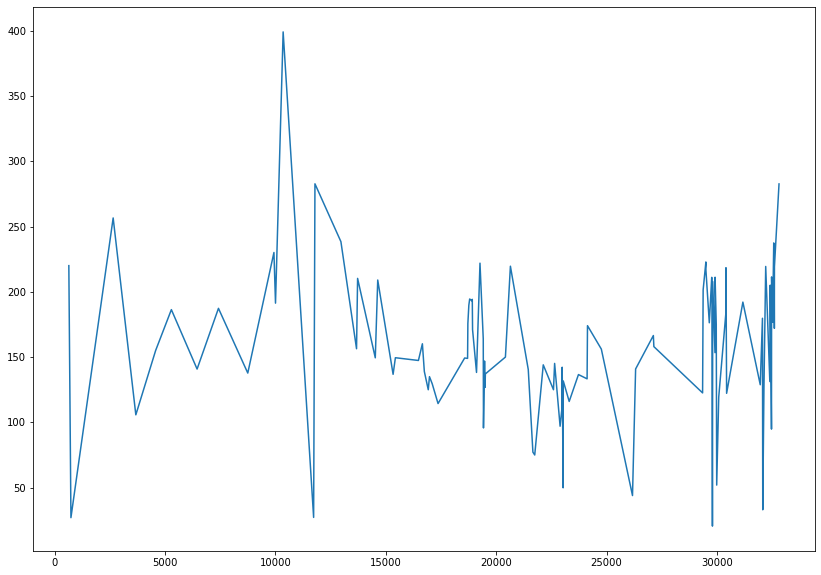

In [154]:
plt.figure(figsize=(14, 10))
x=df_realEstates[df_realEstates["nbrePieces"]==7].index
y=df_realEstates[df_realEstates["nbrePieces"]==7].surfLot
plt.plot(x,y)

Let's select the ones under 100m²

In [155]:
df_realEstates[(df_realEstates["nbrePieces"] == 7) & (df_realEstates["surfLot"] < 100)]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
737,738,395,27.00,7,Appartement,738,738,10,AV,DURANTE,6000,NICE,6,738,2020-06-04,131600.0,Vente,738
11731,11732,10,27.20,7,Maison,11732,11732,3,RUE,NOEL,51100,REIMS,51,11732,2020-05-12,164480.0,Vente,11732
19425,19426,313,95.73,7,Appartement,19426,19426,8,RUE,G. LENOTRE,78120,RAMBOUILLET,78,19426,2020-06-26,350000.0,Vente,19426
21664,21665,1,77.19,7,Appartement,21665,21665,62,,GRAND RUE,88250,LA BRESSE,88,21665,2020-02-17,125000.0,Vente,21665
21747,21748,128,75.00,7,Maison,21748,21748,2,RUE,DES CHARONNES,89100,MALAY LE GRAND,89,21748,2020-05-13,204000.0,Vente,21748
22896,22897,41,97.03,7,Maison,22897,22897,11,ALL,RABELAIS,91400,ORSAY,91,22897,2020-01-15,450000.0,Vente,22897
23034,23035,40,49.87,7,Appartement,23035,23035,1,ALL,DES ORANGERS BT O,91940,LES ULIS,91,23035,2020-05-15,126500.0,Vente,23035
26176,26177,150,43.93,7,Appartement,26177,26177,2,QUAI,PIERRE BROSSOLETTE,94340,JOINVILLE-LE-PONT,94,26177,2020-02-26,252427.0,Vente,26177
29797,29798,100,20.55,7,Appartement,29798,29798,104,RUE,DU BAC,75007,PARIS 07,75,29798,2020-01-22,8577710.0,Vente,29798
29990,29991,62,51.95,7,Appartement,29991,29991,3,AV,DE L OBSERVATOIRE,75006,PARIS 06,75,29991,2020-04-23,839800.0,Vente,29991


The rows 737,11731,32076 have areas of 1 room properties:

In [156]:
df_realEstates.loc[[737,11731,29797,32076],'nbrePieces']=1

The rows 23034, 26176 2 rooms:

In [157]:
df_realEstates.loc[[23034, 26176],'nbrePieces']=2

In [158]:
df_realEstates.loc[29990,'nbrePieces']=3

Checking for 6 rooms:

In [159]:
df_realEstates[(df_realEstates["nbrePieces"] == 6) & (df_realEstates["surfLot"] < 100)]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
265,266,1,93.89,6,Maison,266,266,5,RUE,FERNAND BAZIN,2600,COEUVRES ET VALSERY,2,266,2020-06-18,169000.0,Vente,266
467,468,2,72.72,6,Appartement,468,468,9,AV,MAURICE PETSCHE,5100,BRIANCON,5,468,2020-02-27,238000.0,Vente,468
2013,2014,12,10.65,6,Appartement,2014,2014,3,RUE,DU PRESIDENT KENNEDY,8000,CHARLEVILLE-MEZIERES,8,2014,2020-04-30,166000.0,Vente,2014
3324,3325,5180,95.65,6,Maison,3325,3325,29,PARC,DES VIEUX CYPRES,13013,MARSEILLE 13EME,13,3325,2020-01-10,285000.0,Vente,3325
3920,3921,79,92.98,6,Maison,3921,3921,5,RUE,HENRY BORDEAUX,17000,LA ROCHELLE,17,3921,2020-04-29,188600.0,Vente,3921
4452,4453,18,83.99,6,Appartement,4453,4453,2,RUE,DE LA PAPETERIE,25290,ORNANS,25,4453,2020-02-10,89000.0,Vente,4453
5038,5039,6,95.00,6,Maison,5039,5039,6,,PARC DE LANN ROHOU,29460,DIRINON,29,5039,2020-03-20,120000.0,Vente,5039
5141,5142,1,98.77,6,Maison,5142,5142,5001,,FOCE INCESA,20137,PORTO-VECCHIO,20,5142,2020-03-02,678000.0,Vente,5142
5928,5929,838,88.22,6,Appartement,5929,5929,26,AV,LEON BLUM,31500,TOULOUSE,31,5929,2020-05-20,198350.0,Vente,5929
6433,6434,138,83.18,6,Maison,6434,6434,3,AV,DU MENHIR,33600,PESSAC,33,6434,2020-02-17,340000.0,Vente,6434


In [160]:
df_realEstates.loc[[2013,9963],'nbrePieces']=0
df_realEstates.loc[[14176,17432],'nbrePieces']=1
df_realEstates.loc[[12496,30212],'nbrePieces']=2
df_realEstates.loc[8285,'nbrePieces']=3

Finally for 5 rooms:

In [161]:
df_realEstates[(df_realEstates["nbrePieces"] == 5) & (df_realEstates["surfLot"] < 60)]

,id_x,numLot,surfLot,nbrePieces,typLoc,adresse_id,id_y,numVoie,typVoie,voie,cp,ville,codeDep,id,datMut,valFonc,natMut,bien_id
632,633,49,20.77,5,Appartement,633,633,27,RUE,LAMARTINE,6000,NICE,6,633,2020-03-09,692000.0,Vente,633
758,759,39,36.40,5,Appartement,759,759,10,RUE,DU CONGRES,6000,NICE,6,759,2020-06-17,1582540.0,Vente,759
1312,1313,2,16.72,5,Appartement,1313,1313,5,RUE,ANFOSSI,6670,LEVENS,6,1313,2020-06-09,130000.0,Vente,1313
5195,5196,11,45.71,5,Maison,5196,5196,9448,,PAVELLONE,20137,PORTO-VECCHIO,20,5196,2020-03-06,600000.0,Vente,5196
7973,7974,118,28.73,5,Appartement,7974,7974,23,RUE,JEAN MONNET,35200,RENNES,35,7974,2020-05-29,242500.0,Vente,7974
9806,9807,3,58.73,5,Maison,9807,9807,5220,PL,DU CENTRE,42430,SAINT-JUST-EN-CHEVALET,42,9807,2020-01-15,65000.0,Vente,9807
9914,9915,166,59.87,5,Appartement,9915,9915,26,RUE,DE VIENNE,43000,LE PUY EN VELAY,43,9915,2020-03-17,75000.0,Vente,9915
10231,10232,6,27.65,5,Appartement,10232,10232,6,RUE,GAMBETTA,44000,NANTES,44,10232,2020-06-09,174570.0,Vente,10232
11175,11176,1,21.38,5,Appartement,11176,11176,1,RUE,DU PONT DES ARTS,48150,MEYRUEIS,48,11176,2020-02-04,29000.0,Vente,11176
11635,11636,6,37.57,5,Appartement,11636,11636,48,AV,DU MARECHAL FOCH,51200,EPERNAY,51,11636,2020-03-06,109150.0,Vente,11636


In [162]:
df_realEstates.loc[[1312,29467,29692],'nbrePieces']=0
df_realEstates.loc[[758,7973,10231,11175,25237,29574],'nbrePieces']=1
df_realEstates.loc[[5195,11635,18967,24748,32189,32975,32975],'nbrePieces']=2
df_realEstates.loc[[22588,23395,30256],'nbrePieces']=3

### Spliting before to upload in the database

In [163]:
property = df_realEstates.loc[:, ['id_x', 'numLot', 'surfLot', 'nbrePieces', 'typLoc', 'adresse_id']]
adress = df_realEstates.loc[:, ['id_y', 'numVoie', 'typVoie', 'voie', 'cp', 'ville', 'codeDep']]
sale = df_realEstates.loc[:, ['id', 'datMut', 'valFonc', 'natMut', 'bien_id']]

In [164]:
property.rename(columns={'id_x': 'id'},inplace=True)
adress.rename(columns={'id_Y': 'id'},inplace=True)
property.head()

,id,numLot,surfLot,nbrePieces,typLoc,adresse_id
0,1,22,50.42,2,Appartement,1
1,2,12,48.22,3,Appartement,2
2,3,146,130.80,6,Appartement,3
3,4,11,109.22,5,Maison,4
4,5,31,108.65,4,Appartement,5


In [176]:
property.dtypes

id              int64
numLot         object
surfLot       float64
nbrePieces      int64
typLoc         object
adresse_id      int64
dtype: object

In [177]:
sale.dtypes

id                  int64
datMut     datetime64[ns]
valFonc           float64
natMut             object
bien_id             int64
dtype: object

### Loading back in the database

In [ ]:
property.to_sql('bienimmo', engine, if_exists='replace', index=False)
adress.to_sql('adress', engine, if_exists='replace', index=False)
sale.to_sql('vente', engine, if_exists='replace', index=False)

## SQL QUERIES

In [12]:
query = "select * from bienimmo limit 10"
df = pd.read_sql_query(query,engine)

In [13]:
df

,id,numLot,surfLot,nbrePieces,typLoc,adresse_id
0,1,22,50.42,2,Appartement,1
1,2,12,48.22,3,Appartement,2
2,3,146,130.80,6,Appartement,3
3,4,11,109.22,5,Maison,4
4,5,31,108.65,4,Appartement,5
5,6,50,31.65,2,Appartement,6
6,7,11,52.58,2,Appartement,7
7,8,304,58.71,2,Appartement,8
8,9,14,93.23,4,Maison,9
9,10,21,117.00,5,Maison,10


#### Proportion of sales for each type of flat (Studio (1), 1 bedroom (2), etc...):

In [16]:
query="select nbrePieces,round((count(*)/31377)*100,1) as ProportionVentes  from bienimmo join vente on bienimmo.id=vente.bien_id where bienimmo.typLoc='Appartement' group by nbrePieces order by ProportionVentes desc "
sales_per_nbr_room = pd.read_sql_query(query,engine)
sales_per_nbr_room

,nbrePieces,ProportionVentes
0,2,31.2
1,3,28.6
2,1,21.5
3,4,14.2
4,5,3.6
5,6,0.7
6,7,0.2
7,0,0.1
8,8,0.1
9,9,0.0


#### Price per m² of flats  per departements ordered from the highest to the lowest:

In [17]:
query="Select codeDep,format ((avg(valFonc)/avg(surfLot)),0) as prixM2 from vente join bienImmo on vente.bien_id=bienImmo.id join adresse on bienImmo.adresse_id=adresse.id where bienImmo.typLoc='Appartement' group by codeDep order by avg(valFonc) desc limit 10;"
m2Price_per_departement= pd.read_sql_query(query,engine)
m2Price_per_departement

,codeDep,prixM2
0,75,"11,902"
1,92,"7,219"
2,94,"4,932"
3,69,"3,915"
4,6,"4,611"
5,78,"4,015"
6,74,"4,109"
7,93,"4,079"
8,20,"3,543"
9,1,"2,828"


#### Evolution rate from first to second trimester 

In [18]:
query="with TR1 as (select count(*) as NbreVentes from vente where datMut>='2020-01-01' and datMut<='2020-03-31'),\
     TR2 as (select count(*) as NbreVentes from vente where  datMut>='2020-04-01' and  datMut<='2020-06-30')\
     select round(((TR2.NbreVentes-TR1.NbreVentes)/TR1.NbreVentes)*100,2) as SalesVariationFromTr1ToTr2 from TR1 join TR2;"  
evolOfSales=pd.read_sql_query(query,engine)
evolOfSales

,SalesVariationFromTr1ToTr2
0,3.67


##### Liste of cities where the sales rate has evolved by 20% and more

In [19]:
P1="with TR1 as (select ville, count(*) as NbreVentes from vente join bienimmo on vente.bien_id=bienimmo.id join "
P2="adresse on bienimmo.adresse_id=adresse.id where datMut>='2020-01-01' and datMut<='2020-03-31' group by ville), "
P3="TR2 as (select ville, count(*) as NbreVentes from vente join bienimmo on vente.bien_id=bienimmo.id join adresse "
P4="on bienimmo.adresse_id=adresse.id where datMut>='2020-04-01' and datMut<='2020-06-30' group by ville) "
P5="select TR2.ville,TR1.NbreVentes as NbreVenteTR1,TR2.NbreVentes as NbreVenteTR2, "
P6="format(((TR2.NbreVentes-TR1.NbreVentes)/TR1.NbreVentes)*100 ,0) as PourcentDiff "
P7="from TR2 join TR1 on TR2.ville=TR1.ville where TR2.NbreVentes>=1.2*TR1.NbreVentes group by TR2.ville limit 25;"
query=P1+P2+P3+P4+P5+P6+P7

In [20]:
citiesList_20=pd.read_sql_query(query,engine)
citiesList_20

,ville,NbreVenteTR1,NbreVenteTR2,PourcentDiff
0,DIVONNE-LES-BAINS,5,6,20
1,LAON,11,14,27
2,VILLERS-COTTERETS,3,5,67
3,CHATEAU-ARNOUX-SAINT-AUBAN,1,2,100
4,BARCELONNETTE,2,5,150
5,SAINT-MARTIN-DE-BROMES,1,2,100
6,BRIANCON,5,6,20
7,ORCIERES,1,5,400
8,GAP,2,6,200
9,EMBRUN,1,2,100


#### Top 3 most expensives cities in departement:6,13,33,59,69

In [21]:
query="with Clt as (select ville,codeDep as Département,  format(avg(valFonc),0) as MoyFoncière,rank() over (partition by codeDep order by avg(valFonc) desc)  as classement from vente join bienImmo on vente.bien_id=bienImmo.id join adresse on bienImmo.adresse_id=adresse.id where codeDep=6 or codeDep=13 or codeDep=33 or codeDep=59 or codeDep=69 group by ville) select * from Clt where classement<4;"
Top3=pd.read_sql_query(query,engine)
Top3

,ville,Département,MoyFoncière,classement
0,SAINT-JEAN-CAP-FERRAT,6,"968,750",1
1,EZE,6,"655,000",2
2,MOUANS-SARTOUX,6,"476,898",3
3,GIGNAC-LA-NERTHE,13,"330,000",1
4,SAINT SAVOURNIN,13,"314,425",2
5,CASSIS,13,"313,417",3
6,LEGE-CAP-FERRET,33,"549,501",1
7,VAYRES,33,"335,000",2
8,ARCACHON,33,"307,436",3
9,BERSEE,59,"433,202",1
